In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Datos.shape

(891, 12)

In [6]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [7]:
Datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en edad: ",Datos['Age'].isna().sum())

Cantidad de Registros con cero en edad:  177


In [9]:
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())


In [10]:
print("Cantidad de Registros con cero en edad: ",Datos['Age'].isna().sum())

Cantidad de Registros con cero en edad:  0


In [11]:
#se elimina columna cavbina porque falta 687 datos de 891 lo que es un porcentaje muy alto para reemplzar los datos
Datos = Datos.drop ('Cabin',axis=1)

In [12]:
#se elimina el nombre del pasajero y el nombre del tuquete porque en mi parecer es irrelavante para procesar los datos
Datos = Datos.drop ('Name',axis=1)
Datos = Datos.drop ('Ticket',axis=1)
Datos = Datos.drop ('Embarked',axis=1)

In [13]:
Datos = Datos.dropna()

In [14]:
Datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [16]:
# List of variables to map

varlist =  ['Sex']

# Defining the map function
def binary_map(x):
    return x.map({'male': 1, "female": 0})

# Applying the function to the housing list
Datos[varlist] = Datos[varlist].apply(binary_map)

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

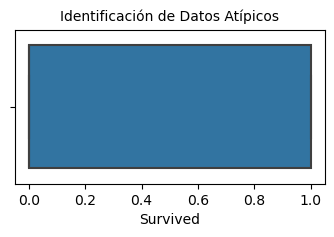

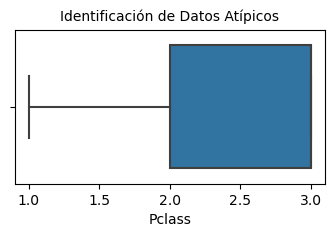

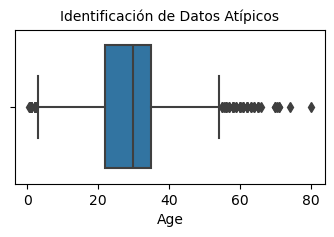

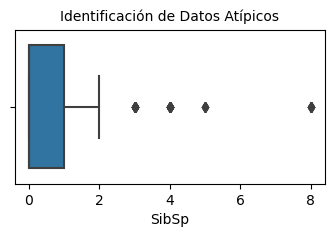

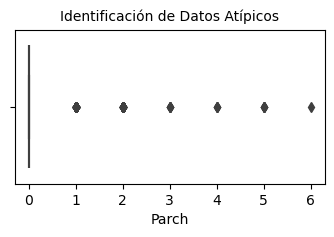

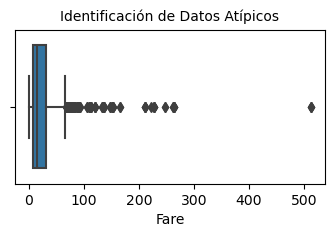

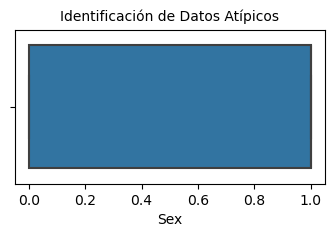

In [17]:
#Identificación de Datos Atípicos

plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Sex'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )


In [18]:
nivel_minimo_Fare=0
nivel_maximo_Fare=200
Total_Atipicos_Fare=((Datos['Fare']<nivel_minimo_Fare)|(Datos['Fare']>nivel_maximo_Fare)).sum()
print("El total de datos atípicos de Tarifa es:  {}".format(Total_Atipicos_Fare))

El total de datos atípicos de Tarifa es:  20


In [19]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Fare']<nivel_maximo_Fare)&(Datos['Fare']>nivel_minimo_Fare)]

In [20]:
nivel_minimo_Fare=0
nivel_maximo_Fare=200
Total_Atipicos_Fare=((Datos['Fare']<nivel_minimo_Fare)|(Datos['Fare']>nivel_maximo_Fare)).sum()
print("El total de datos atípicos de Tarifa es:  {}".format(Total_Atipicos_Fare))

El total de datos atípicos de Tarifa es:  0


In [21]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  856 non-null    int64  
 1   Survived     856 non-null    int64  
 2   Pclass       856 non-null    int64  
 3   Sex          856 non-null    int64  
 4   Age          856 non-null    float64
 5   SibSp        856 non-null    int64  
 6   Parch        856 non-null    int64  
 7   Fare         856 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 60.2 KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [22]:
# Total de personas con enfermedad cardiaca

Datos['Survived'].value_counts()

Survived
0    529
1    327
Name: count, dtype: int64

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [23]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [24]:
print (X_train)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare
887          888       1    0  19.000000      0      0  30.0000
290          291       1    0  26.000000      0      0  78.8500
288          289       2    1  42.000000      0      0  13.0000
479          480       3    0   2.000000      0      1  12.2875
218          219       1    0  32.000000      0      0  76.2917
..           ...     ...  ...        ...    ...    ...      ...
55            56       1    1  29.699118      0      0  35.5000
774          775       2    0  54.000000      1      3  23.0000
53            54       2    0  29.000000      1      0  26.0000
632          633       1    1  32.000000      0      0  30.5000
499          500       3    1  24.000000      0      0   7.7958

[642 rows x 7 columns]


5.Entrenar el modelo configurando los diferentes hiperparámetros

In [25]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [26]:
print (Y_test)

449    1
670    1
645    1
58     1
621    1
      ..
493    0
467    0
644    1
47     1
0      0
Name: Survived, Length: 214, dtype: int64


In [27]:
print (Prediccion)

[0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [28]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       132
           1       0.84      0.71      0.77        82

    accuracy                           0.84       214
   macro avg       0.84      0.81      0.82       214
weighted avg       0.84      0.84      0.83       214



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

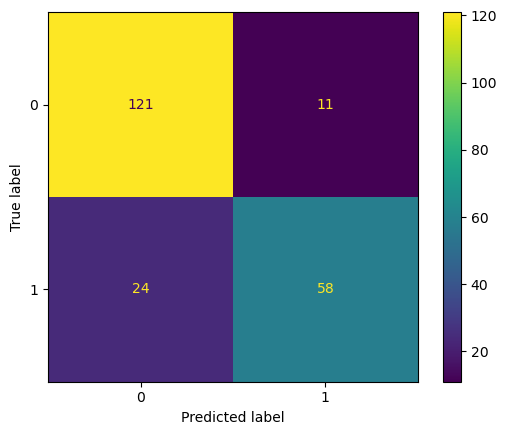

In [29]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

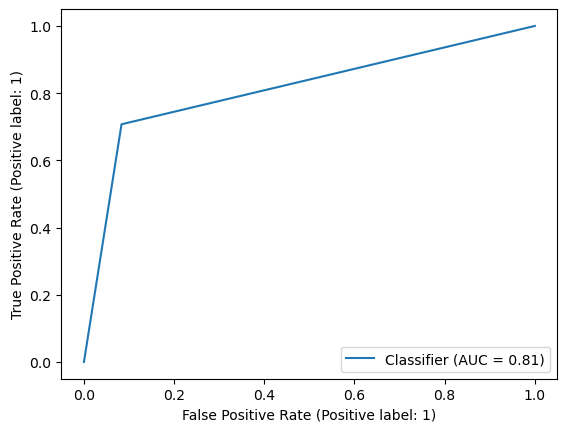

In [30]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

***concluciones:***
* Alta Precisión Global:
El modelo de regresión logística tiene una precisión global (accuracy) de 0.84, lo que significa que el modelo clasifica correctamen
e el 84% de las instancias totales. Esto indica que el modelo tiene un rendimiento bastante sólido en genera
* .
Diferencia en Recall entre Clas:

El recall para la clase "0" (no sobrevivió) es de 0.92, mientras que el recall para la clase "1" (sobrevivió) es de .71. Esto sugiere que el modelo es mucho mejor para identificar correctamente a los que no sobrevivieron (92% de los casos correc
tos) en comparación con los que sobrevivieron (71% de los casos correc os). Esta diferencia podría indicar que el modelo tiende a ser más conser ador y clasifica a más personas como no sobrevivie
* tes.
Equilibrio en la Precisión entre C ases, pero Desequilibrio en :all:

La precisión para ambas clases es similar (0.83 para clase "0" y 0.84 para clase "1"), lo que indica que, cuando el modelo predice un clase, lo hace con una precisión similar para ambas. Sin embargo, el f1-score, que es la media armónica de la precisión y elrecall, es más alto para la clase "0" (0.87) que para la clase "1" (0.77). Esto resalta que, aunque la precisión es equilibrada, la capacidad del modelo para capturar verdaderos positivos (recall) es significativamente mejor para 
la clase "0" que para la cl
* se "1".:
Resumen
El modelo de regresión logística utilizado para predecir la supervivencia en el Titanic muestra una alta precisi
n global, un mejor rendimiento en la identificación de no sobrevivientes en comparación con los sobre
ivientes, y una precisión equilibrada entre las clases pero con un f1-score superior para la clase "0" debido a un mayor recall en e
sa clase. Estas conclusiones podrían indicar la necesidad de ajustar el modelo para mejorar su
capacidad de detectar sobrevivientes sin sacrificar la precisión.